In [2]:
!python src/train.py --model unet --epochs 30 --batch_size 8

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Epoch 1/30
Train Loss: 1.5412 | Dice: 0.3909 | IoU: 0.2731
Val   Loss: 1.4200 | Dice: 0.4789 | IoU: 0.3485
Best model saved!
Epoch 2/30
Train Loss: 1.4613 | Dice: 0.4397 | IoU: 0.3136
Val   Loss: 1.3382 | Dice: 0.5272 | IoU: 0.3947
Best model saved!
Epoch 3/30
Train Loss: 1.4243 | Dice: 0.4595 | IoU: 0.3303
Val   Loss: 1.3291 | Dice: 0.5227 | IoU: 0.3906
Epoch 4/30
Train Loss: 1.3904 | Dice: 0.4765 | IoU: 0.3450
Val   Loss: 1.2832 | Dice: 0.5681 | IoU: 0.4291
Best model saved!
Epoch 5/30
Train Loss: 1.3555 | Dice: 0.4991 | IoU: 0.3689
Val   Loss: 1.2582 | Dice: 0.5956 | IoU: 0.4588
Best model saved!
Epoch 6/30
Train Loss: 1.3275 | Dice: 0.5158 | IoU: 0.3840
Val   Loss: 

In [3]:
!python src/train.py --model unet --epochs 30 --batch_size 8

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Epoch 1/30
Train Loss: 1.5099 | Dice: 0.3994 | IoU: 0.2787 | Acc: 0.7223 | Prec: 0.3190 | Rec: 0.7126
Val   Loss: 1.3772 | Dice: 0.5059 | IoU: 0.3697 | Acc: 0.7733 | Prec: 0.4207 | Rec: 0.7532
Best model saved!
Epoch 2/30
Train Loss: 1.4251 | Dice: 0.4592 | IoU: 0.3298 | Acc: 0.8125 | Prec: 0.4155 | Rec: 0.6579
Val   Loss: 1.3074 | Dice: 0.5321 | IoU: 0.3952 | Acc: 0.8059 | Prec: 0.4699 | Rec: 0.7451
Best model saved!
Epoch 3/30
Train Loss: 1.3877 | Dice: 0.4755 | IoU: 0.3449 | Acc: 0.8185 | Prec: 0.4288 | Rec: 0.6680
Val   Loss: 1.2662 | Dice: 0.5644 | IoU: 0.4242 | Acc: 0.8380 | Prec: 0.5348 | Rec: 0.6980
Best model saved!
Epoch 4/30
Train Loss: 1.3521 | Dice: 0.4944 

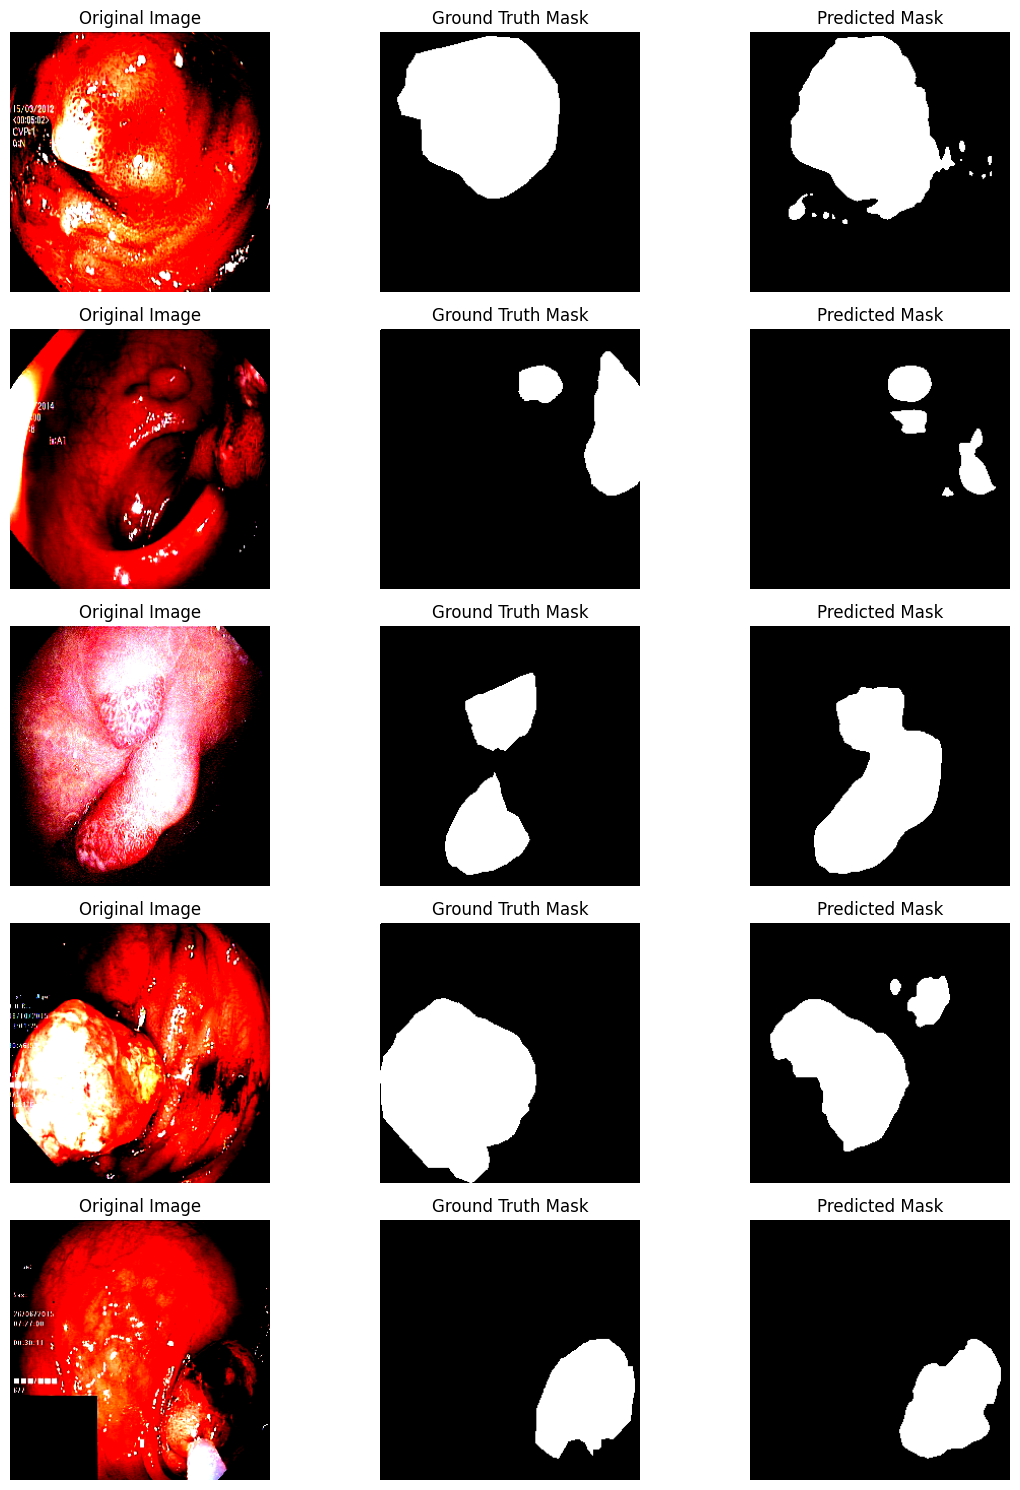

In [6]:
import sys
sys.path.append('src')

import torch
import matplotlib.pyplot as plt
from utils.data_utils import PolypDataset, get_transforms
from models.unet import UNet
import numpy as np

# Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet().to(device)
model.load_state_dict(torch.load('checkpoints/best_unet.pth', map_location=device))
model.eval()

# Validation dataset
val_dataset = PolypDataset('data/Kvasir-SEG/val', get_transforms(is_train=False), is_train=False)

# Visualization
num_samples = 5  # Number of samples to show
plt.figure(figsize=(12, num_samples * 3))
for i in range(num_samples):
    image, mask = val_dataset[i]
    with torch.no_grad():
        input_img = image.unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_img)).cpu().squeeze().numpy()
    img_np = image.permute(1, 2, 0).numpy()
    mask_np = mask.squeeze().numpy()
    pred_mask = (pred > 0.5).astype(np.uint8)

    plt.subplot(num_samples, 3, i*3+1)
    plt.imshow(img_np)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3+2)
    plt.imshow(mask_np, cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3+3)
    plt.imshow(pred_mask, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.savefig('prediction_visuals.png')
plt.show()

In [7]:
!python src/train.py --model attention_unet --epochs 30 --batch_size 8

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Epoch 1/30
Train Loss: 1.5288 | Dice: 0.3921 | IoU: 0.2725 | Acc: 0.7115 | Prec: 0.3062 | Rec: 0.7358
Val   Loss: 1.4437 | Dice: 0.4472 | IoU: 0.3167 | Acc: 0.6869 | Prec: 0.3413 | Rec: 0.8329
Best model saved!
Epoch 2/30
Train Loss: 1.4526 | Dice: 0.4342 | IoU: 0.3087 | Acc: 0.7735 | Prec: 0.3598 | Rec: 0.6947
Val   Loss: 1.3553 | Dice: 0.5243 | IoU: 0.3886 | Acc: 0.8343 | Prec: 0.5295 | Rec: 0.5937
Best model saved!
Epoch 3/30
Train Loss: 1.4148 | Dice: 0.4553 | IoU: 0.3283 | Acc: 0.7990 | Prec: 0.3956 | Rec: 0.6718
Val   Loss: 1.3459 | Dice: 0.5114 | IoU: 0.3786 | Acc: 0.7716 | Prec: 0.4250 | Rec: 0.7975
Epoch 4/30
Train Loss: 1.3817 | Dice: 0.4723 | IoU: 0.3442 | Ac

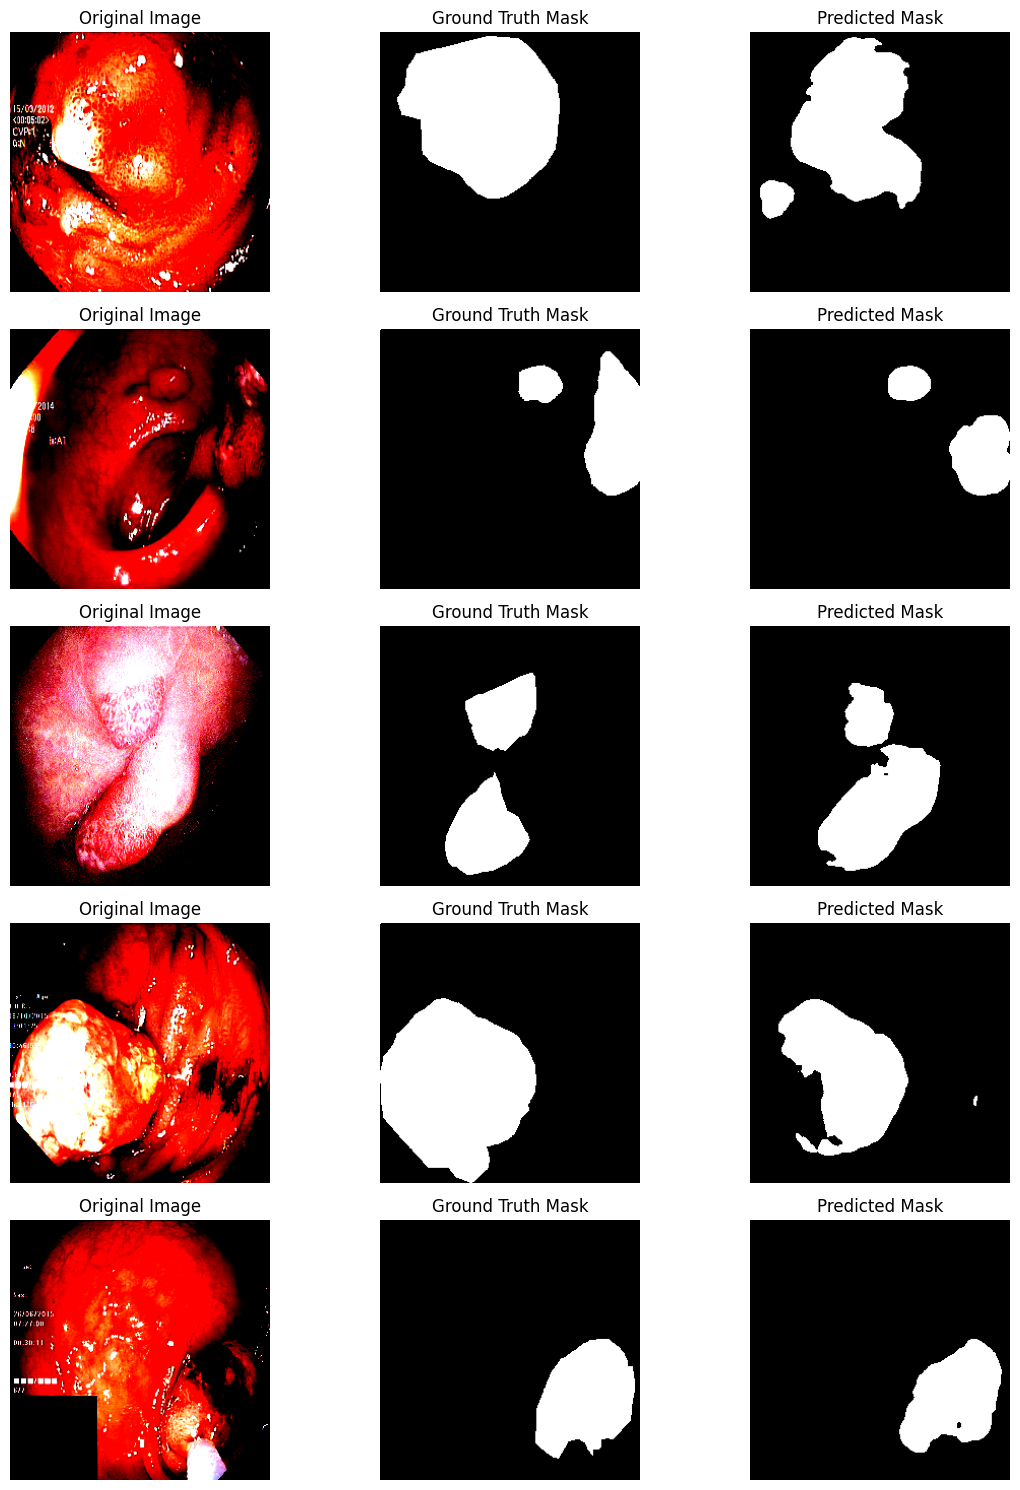

In [8]:
import sys
sys.path.append('src')

import torch
import matplotlib.pyplot as plt
from utils.data_utils import PolypDataset, get_transforms
from models.attention_unet import AttentionUNet
import numpy as np

# Load Attention U-Net model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AttentionUNet().to(device)
model.load_state_dict(torch.load('checkpoints/best_attention_unet.pth', map_location=device))
model.eval()

# Validation dataset
val_dataset = PolypDataset('data/Kvasir-SEG/val', get_transforms(is_train=False), is_train=False)

# Visualization
num_samples = 5  # Number of samples to show
plt.figure(figsize=(12, num_samples * 3))
for i in range(num_samples):
    image, mask = val_dataset[i]
    with torch.no_grad():
        input_img = image.unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_img)).cpu().squeeze().numpy()
    img_np = image.permute(1, 2, 0).numpy()
    mask_np = mask.squeeze().numpy()
    pred_mask = (pred > 0.5).astype(np.uint8)

    plt.subplot(num_samples, 3, i*3+1)
    plt.imshow(img_np)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3+2)
    plt.imshow(mask_np, cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3+3)
    plt.imshow(pred_mask, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.savefig('attention_unet_prediction_visuals.png')
plt.show()

In [10]:
!python src/train.py --model deeplabv3 --epochs 30 --batch_size 8

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://dow

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


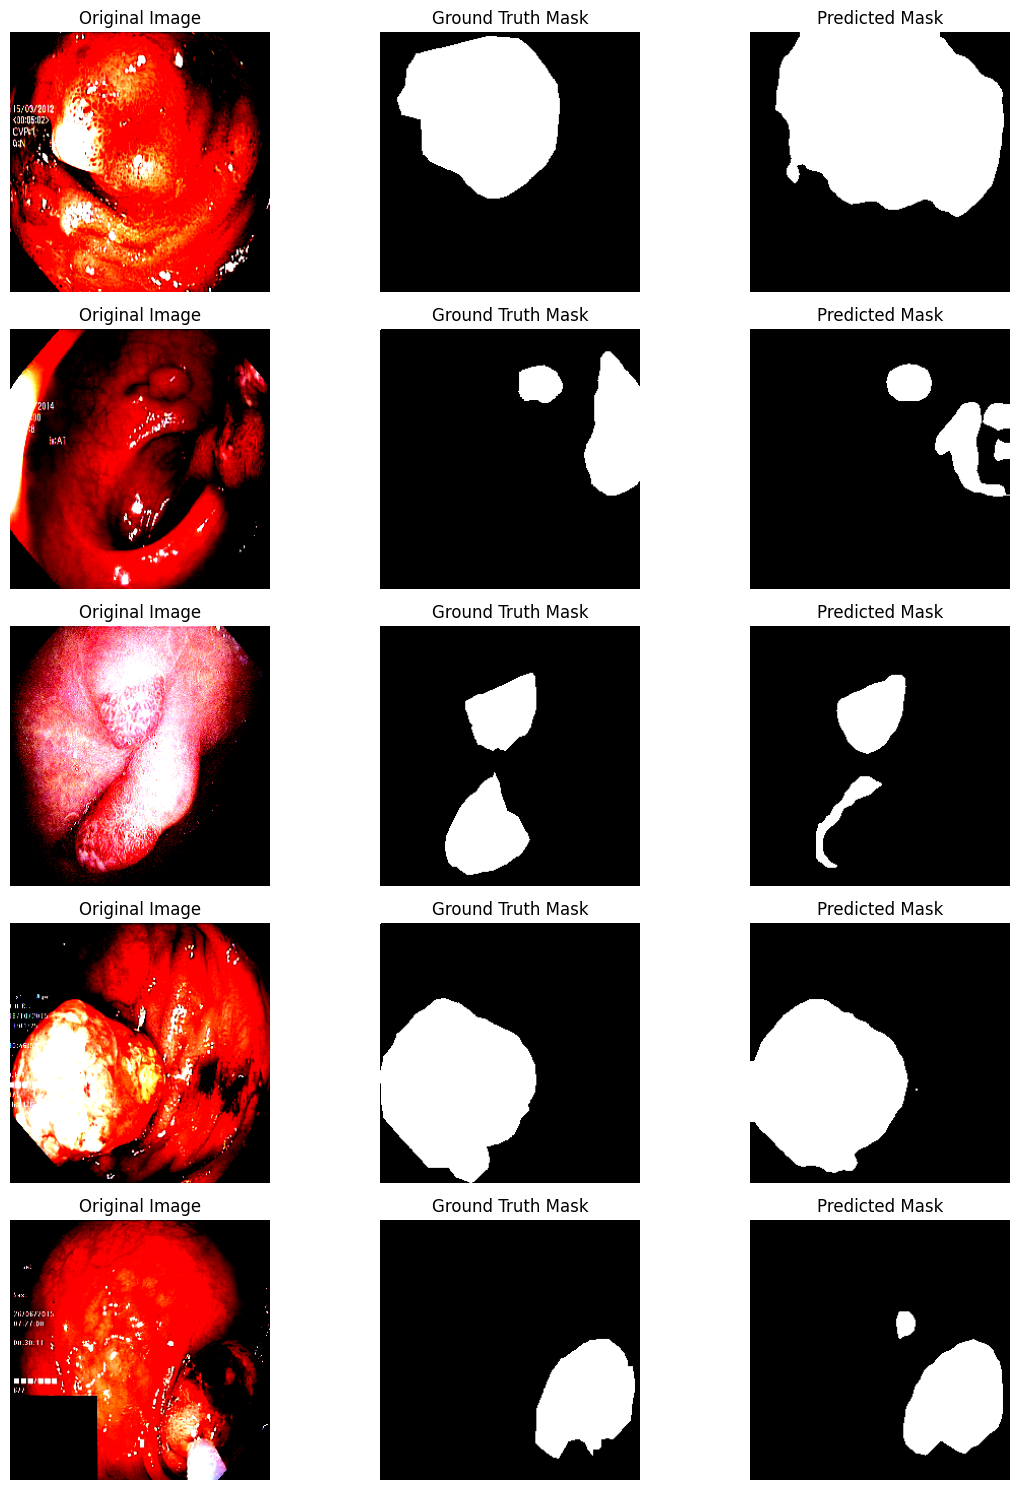

In [11]:
import sys
sys.path.append('src')

import torch
import matplotlib.pyplot as plt
from utils.data_utils import PolypDataset, get_transforms
from models.deeplabv3 import DeepLabV3Plus
import numpy as np

# Load DeepLabV3+ model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DeepLabV3Plus().to(device)
model.load_state_dict(torch.load('checkpoints/best_deeplabv3.pth', map_location=device))
model.eval()

# Validation dataset
val_dataset = PolypDataset('data/Kvasir-SEG/val', get_transforms(is_train=False), is_train=False)

# Visualization
num_samples = 5  # Number of samples to show
plt.figure(figsize=(12, num_samples * 3))
for i in range(num_samples):
    image, mask = val_dataset[i]
    with torch.no_grad():
        input_img = image.unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_img)).cpu().squeeze().numpy()
    img_np = image.permute(1, 2, 0).numpy()
    mask_np = mask.squeeze().numpy()
    pred_mask = (pred > 0.5).astype(np.uint8)

    plt.subplot(num_samples, 3, i*3+1)
    plt.imshow(img_np)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3+2)
    plt.imshow(mask_np, cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3+3)
    plt.imshow(pred_mask, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.savefig('deeplabv3_prediction_visuals.png')
plt.show()